In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math 

# analysis of theorectical FOV in single-layer waveguide (WG)

Field of View (FOV) is crucial in AR waveguides because it determines how much virtual content the user sees, directly impacting immersion and usability; wider FOVs offer a more expansive, realistic view, but are challenging to achieve in compact waveguide designs due to inherent light confinement (Total Internal Reflection (TIR)) and efficiency trade-offs, requiring advanced grating designs to balance large FOV with uniform, bright, distortion-free images. 

It is typical to use complex diffraction grating designs, multi-layer structures, and high-index materials to overcome these limitations, pushing FOVs to wider angles while maintaining quality. 


## below are a few terminology or definition: 

n_air = refractive index of air

n_glass = refractive index of a waveguide 

wl = wavelength in vacuum (nm)

wl_min (nm) = minimum wavelength guided in the WG

wl_max (nm) = maximum wavelength guided in the WG

theta = angle (deg)

theta_d_min = minimum diffraction angle (deg)

theta_d_max = maximum diffraction angle (deg)

theta_in = incident angle from air (deg)

pitch = grating period of grating (nm)


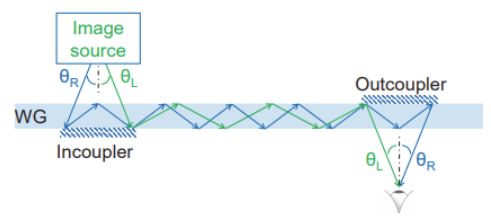

In [2]:
def critical_angle(ng):
    
    theta_d_min = math.asin(1/ng)
    theta_d_min = math.degrees(theta_d_min)
    print(f"critical angle, aka. theta_d_min : {theta_d_min: .2f} deg") 
    return theta_d_min

In [3]:
critical_angle(1.8)

critical angle, aka. theta_d_min :  33.75 deg


33.74898859588859

In [4]:
def FOV(wl_min, wl_max,ng,theta_d_max):
    theta_d_max = math.radians(theta_d_max)
    theta_d_min = math.radians(critical_angle(ng)) 
    FOV = 2*math.asin((ng*math.sin(theta_d_max) - (ng*wl_max/(wl_min+wl_max)*(math.sin(theta_d_max) + math.sin(theta_d_min)))))
    FOV = math.degrees(FOV)
    print(f"field of view is: {FOV}")
    return FOV 

In [5]:
FOV(457,630,2,90)


critical angle, aka. theta_d_min :  30.00 deg
field of view is: 30.290812077436257


30.290812077436257

In [6]:
# theta_d_max = 90
# ng = 2
# wl_max =630
# wl_min = 457
# theta_d_max = math.radians(theta_d_max)
# theta_d_min = math.radians(critical_angle(ng)) 
# FOV = 2*math.asin((ng*math.sin(theta_d_max) - ng*wl_max/(wl_min+wl_max)*(math.sin(theta_d_max) + math.sin(theta_d_min))))
# FOV = math.degrees(FOV)
# print(f"field of view is: {FOV}")


WG w. index = 1.500000, shows max full-color FOV = 3.390000 degrees
WG w. index = 1.600000, shows max full-color FOV = 8.050000 degrees
WG w. index = 1.700000, shows max full-color FOV = 12.720000 degrees
WG w. index = 1.800000, shows max full-color FOV = 17.420000 degrees
WG w. index = 1.900000, shows max full-color FOV = 22.140000 degrees
WG w. index = 2.000000, shows max full-color FOV = 26.900000 degrees
WG w. index = 2.100000, shows max full-color FOV = 31.710000 degrees
WG w. index = 2.200000, shows max full-color FOV = 36.580000 degrees
WG w. index = 2.300000, shows max full-color FOV = 41.520000 degrees
WG w. index = 2.400000, shows max full-color FOV = 46.540000 degrees
WG w. index = 2.500000, shows max full-color FOV = 51.660000 degrees
WG w. index = 2.600000, shows max full-color FOV = 56.890000 degrees
WG w. index = 2.700000, shows max full-color FOV = 62.250000 degrees


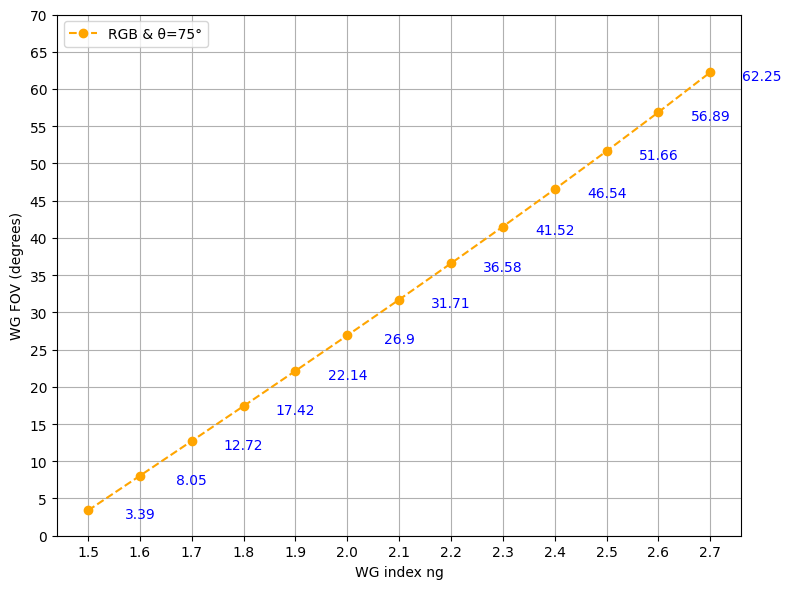

In [7]:
wl_max =630
wl_min = 457
theta_d_max = 75
ng = np.arange(1.5,2.7,0.1)
theta_d_min = np.arcsin(1/ng)
FOV1 = np.degrees(2*np.arcsin((ng*np.sin(np.radians(theta_d_max)) - (ng*wl_max/(wl_min+wl_max)*(np.sin(np.radians(theta_d_max)) + np.sin(theta_d_min))))))
FOVs = np.round(FOV1,2)
for i,j in zip(ng,FOVs):
    print("WG w. index = %f, shows max full-color FOV = %f degrees" %(i,j))

plt.figure(figsize=(8,6))

plt.plot(ng, FOV1, label="RGB & θ=75°", marker = "o", color="orange",linestyle = "--")
for m,n,value in zip(ng,FOV1,FOVs):
    plt.text(m+0.1,n-0.5,str(value),ha="center",va="center",color = "blue")
plt.xlabel("WG index ng")
plt.ylabel("WG FOV (degrees)")

plt.grid(axis="both")

x_tick_positions = np.arange(1.5, 2.7, 0.1)
plt.xticks(x_tick_positions)

y_tick_positions = np.arange(0, 90, 5)
plt.yticks(y_tick_positions)
plt.ylim(0,70)

plt.legend(loc="upper left")
plt.tight_layout()
plt.show()



WG index:1.50, max_G_FOV:25.94degrees, max_RGB_FOV:3.39degrees
WG index:1.60, max_G_FOV:31.65degrees, max_RGB_FOV:8.05degrees
WG index:1.70, max_G_FOV:37.45degrees, max_RGB_FOV:12.72degrees
WG index:1.80, max_G_FOV:43.35degrees, max_RGB_FOV:17.42degrees
WG index:1.90, max_G_FOV:49.37degrees, max_RGB_FOV:22.14degrees
WG index:2.00, max_G_FOV:55.54degrees, max_RGB_FOV:26.90degrees
WG index:2.10, max_G_FOV:61.89degrees, max_RGB_FOV:31.71degrees
WG index:2.20, max_G_FOV:68.46degrees, max_RGB_FOV:36.58degrees
WG index:2.30, max_G_FOV:75.30degrees, max_RGB_FOV:41.52degrees
WG index:2.40, max_G_FOV:82.46degrees, max_RGB_FOV:46.54degrees
WG index:2.50, max_G_FOV:90.05degrees, max_RGB_FOV:51.66degrees
WG index:2.60, max_G_FOV:98.17degrees, max_RGB_FOV:56.89degrees
WG index:2.70, max_G_FOV:107.03degrees, max_RGB_FOV:62.25degrees


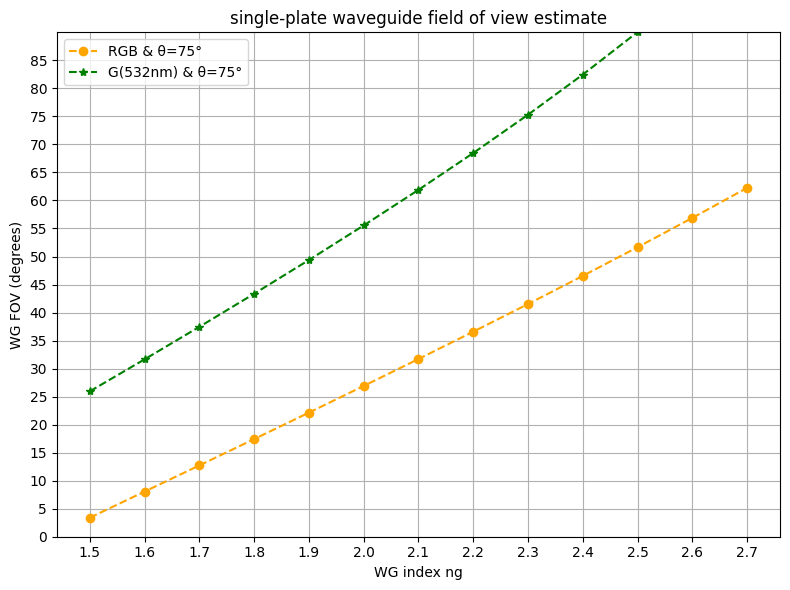

In [8]:
wl_max =630
wl_min = 457
wl_one_color = 532 
theta_d_max = 75
ng = np.arange(1.5,2.7,0.1)
theta_d_min = np.arcsin(1/ng)
FOV1 = np.degrees(2*np.arcsin((ng*np.sin(np.radians(theta_d_max)) - (ng*wl_max/(wl_min+wl_max)*(np.sin(np.radians(theta_d_max)) + np.sin(theta_d_min))))))
FOV1=np.round(FOV1,2)
FOV_one_color = np.degrees(2*np.arcsin((ng*np.sin(np.radians(theta_d_max)) - (ng*wl_one_color/(wl_one_color+wl_one_color)*(np.sin(np.radians(theta_d_max)) + np.sin(theta_d_min))))))
FOV_one_color=np.round(FOV_one_color,2)
for i,j,k in zip(ng,FOV_one_color, FOV1):
    print(f"WG index:{i:4.2f}, max_G_FOV:{j:4.2f}degrees, max_RGB_FOV:{k:4.2f}degrees")

plt.figure(figsize=(8,6))
plt.title("single-plate waveguide field of view estimate")
plt.plot(ng, FOV1, label="RGB & θ=75°", marker = "o", color="orange",linestyle = "--")
plt.plot(ng, FOV_one_color, label="G(532nm) & θ=75°", marker = "*", color="green",linestyle = "--")

plt.xlabel("WG index ng")
plt.ylabel("WG FOV (degrees)")

plt.grid(axis="both")

x_tick_positions = np.arange(1.5, 2.7, 0.1)
plt.xticks(x_tick_positions)

y_tick_positions = np.arange(0, 90, 5)
plt.yticks(y_tick_positions)
plt.ylim(0,90)

plt.legend(loc="upper left")
plt.tight_layout()
plt.show()
